In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [8]:
import nbformat

with open("togo_eda.ipynb", "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)
print(" Notebook is valid.")



 Notebook is valid.


In [4]:
df = pd.read_csv('../data/togo-dapaong_qc.csv')
# df.head(500)
df.shape

(525600, 19)

In [5]:

df.describe()

# For calculating the Missing values
df.isna().sum()

# Columns with >5% missing
missing = df.isna().mean()
missing[missing > 0.05]


Comments    1.0
dtype: float64

In [6]:
z_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[z_cols].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)

# Remove outliers
df_clean = df[~outliers].copy()
print(f"Removed {outliers.sum()} outliers from the dataset.")
# df_outliers = df[outliers]
# print(df_outliers)


Removed 9251 outliers from the dataset.


In [7]:
# Fill missing values in all columns except the first (e.g., timestamp)
df_clean.iloc[:, 1:] = df_clean.iloc[:, 1:].fillna(df_clean.iloc[:, 1:].median())



In [8]:
df_clean.shape

(516349, 19)

In [9]:
df_clean.to_csv('../data/togo_clean.csv', index=False)


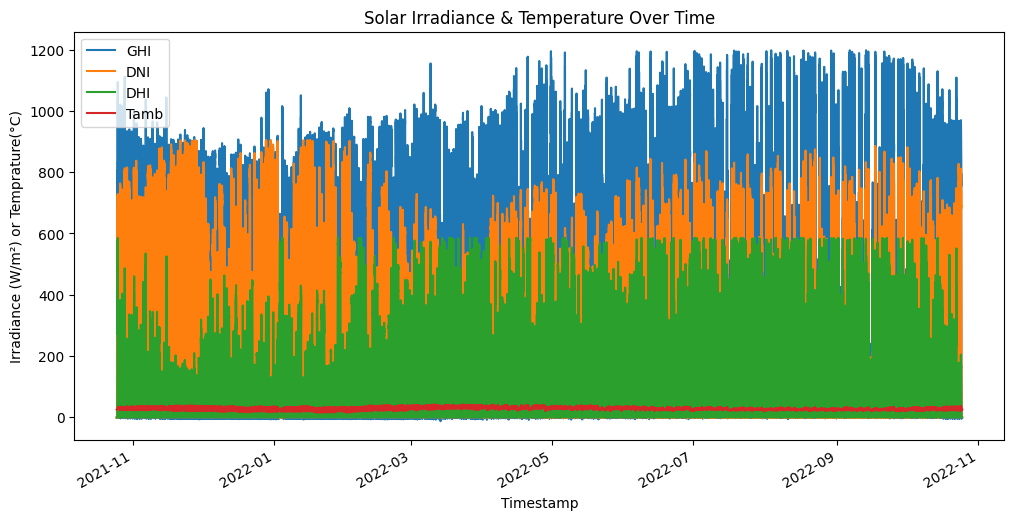

In [10]:

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12,6))
plt.title("Solar Irradiance & Temperature Over Time")
plt.ylabel('Irradiance (W/m²) or Temprature(°C)')
plt.show()


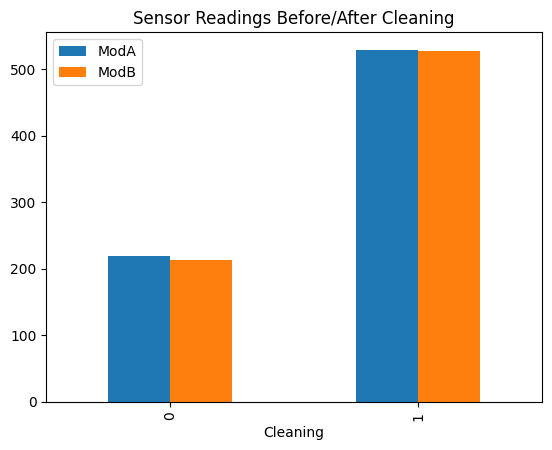

In [11]:
#cleaning impact analysis
# Compare ModA and ModB before and after cleaning
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Sensor Readings Before/After Cleaning")
plt.show()


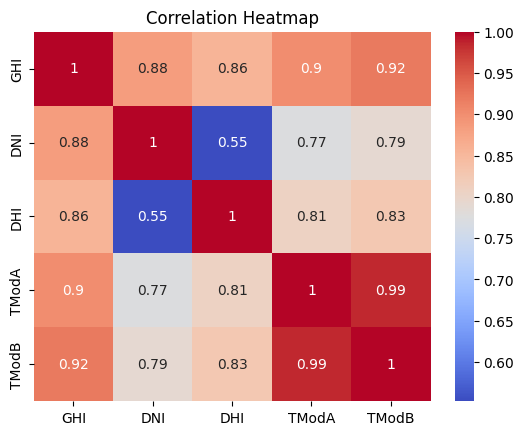

In [12]:
#Correlation & Relationship Analysis

corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


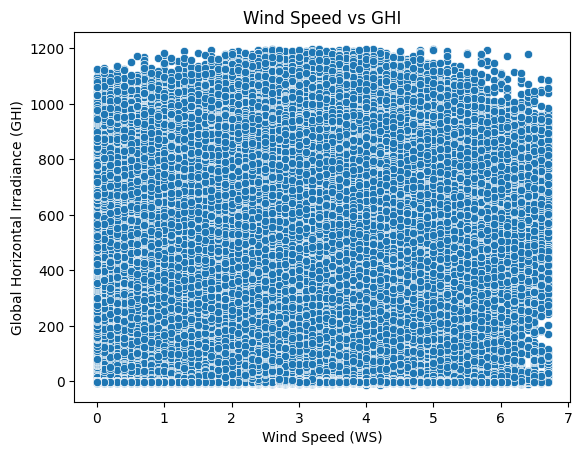

In [13]:
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title("Wind Speed vs GHI")
plt.xlabel("Wind Speed (WS)")
plt.ylabel("Global Horizontal Irradiance (GHI)")
plt.show()


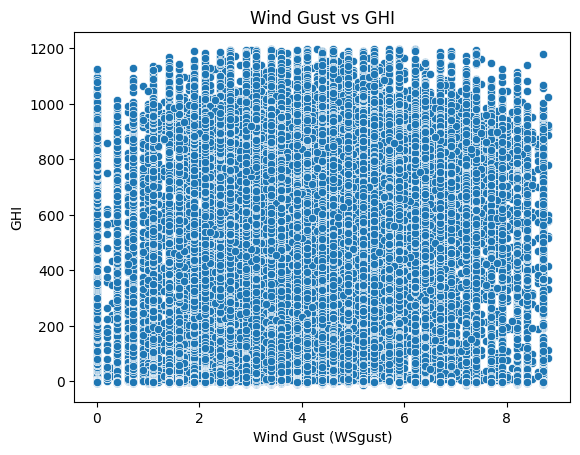

In [14]:
sns.scatterplot(x='WSgust', y='GHI', data=df_clean)
plt.title("Wind Gust vs GHI")
plt.xlabel("Wind Gust (WSgust)")
plt.ylabel("GHI")
plt.show()


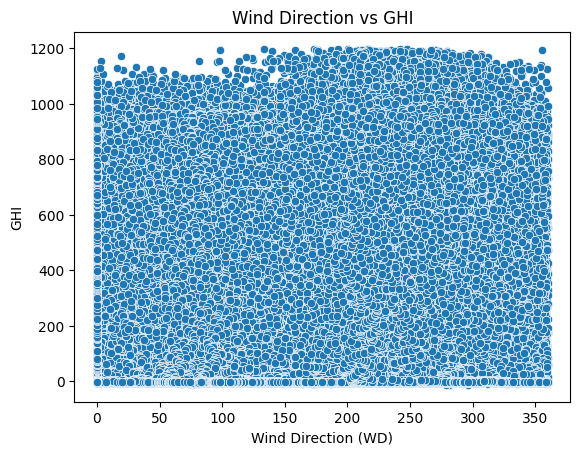

In [15]:
sns.scatterplot(x='WD', y='GHI', data=df_clean)
plt.title("Wind Direction vs GHI")
plt.xlabel("Wind Direction (WD)")
plt.ylabel("GHI")
plt.show()


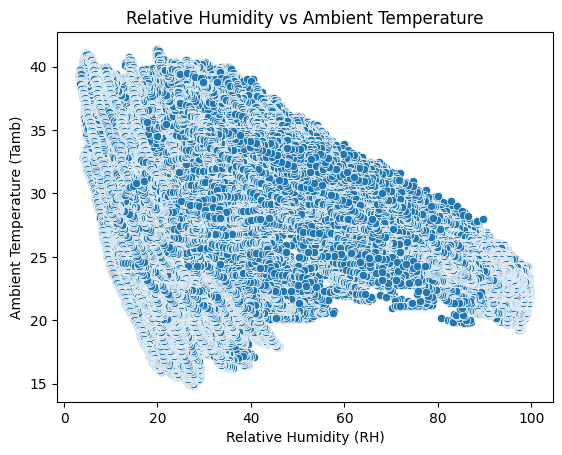

In [16]:
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Relative Humidity vs Ambient Temperature")
plt.xlabel("Relative Humidity (RH)")
plt.ylabel("Ambient Temperature (Tamb)")
plt.show()


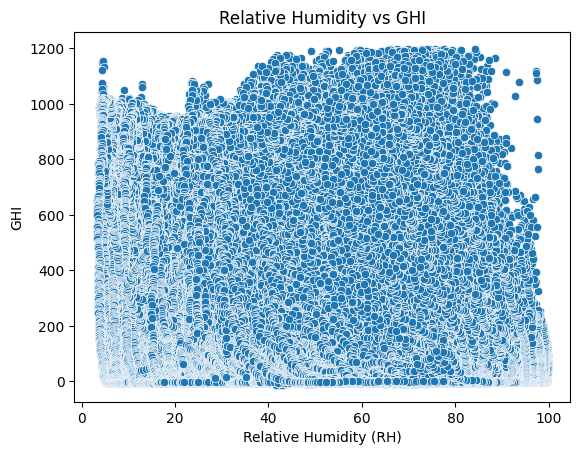

In [17]:
sns.scatterplot(x='RH', y='GHI', data=df_clean)
plt.title("Relative Humidity vs GHI")
plt.xlabel("Relative Humidity (RH)")
plt.ylabel("GHI")
plt.show()


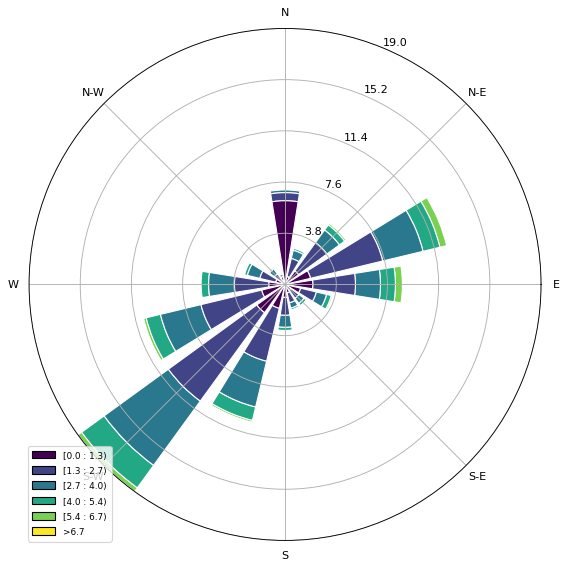

In [18]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()


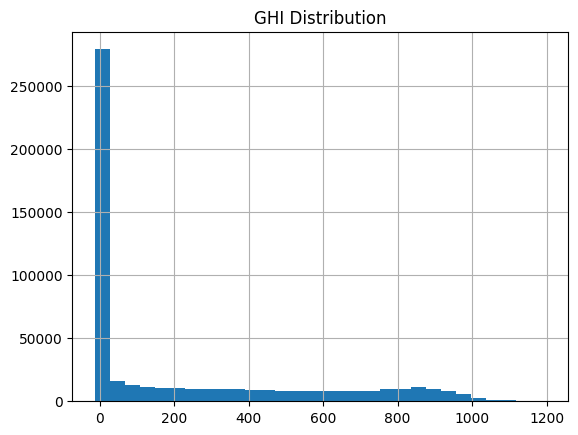

In [19]:
#Histogram for GHI distribution
df_clean['GHI'].hist(bins=30)
plt.title("GHI Distribution")
plt.show()


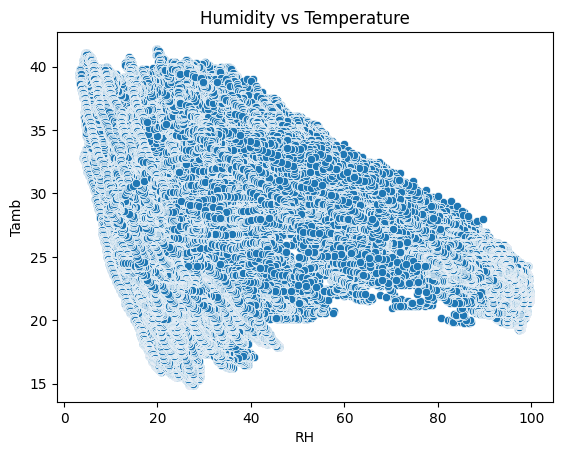

In [20]:
#the influence of relative humidity on the temperature
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Humidity vs Temperature")
plt.show()


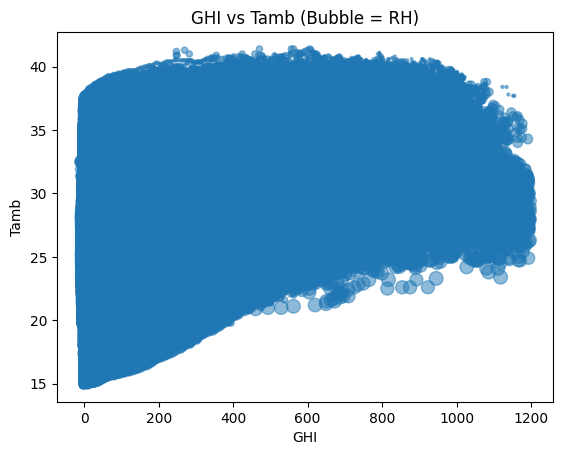

: 

In [ ]:
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Tamb (Bubble = RH)")
plt.show()
